In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/cStick.csv')
data

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0
...,...,...,...,...,...,...,...
2034,5.655,2.0,116.310,162.242,71.310,1.0,2
2035,9.660,2.0,124.320,177.995,79.320,1.0,2
2036,15.220,1.0,93.828,40.440,82.610,1.0,1
2037,9.120,2.0,123.240,175.871,78.240,1.0,2


In [5]:
data.columns

Index(['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer',
       'Decision '],
      dtype='object')

In [6]:
outcome_dict = {0:'No Fall detected',1:'Slip detected',2:'Definite fall'}
outcome_list = ['No Fall detected','Slip detected','Definite fall']
outcome_list

['No Fall detected', 'Slip detected', 'Definite fall']

In [7]:
feature_list = ['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer']
feature_list

['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer']

In [8]:
df_all_cols = data.columns
df_all_cols

Index(['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer',
       'Decision '],
      dtype='object')

In [9]:
# convert to float (if not already float)
df_Cstick1 = data.astype(float)

# convert to numpy arrary
C = df_Cstick1.to_numpy()

# Get features and labels
features = C[:,0:6]
labels = C[:,-1]

features


array([[ 25.54 ,   1.   , 101.396,  61.08 ,  87.77 ,   1.   ],
       [  2.595,   2.   , 110.19 ,  20.207,  65.19 ,   1.   ],
       [ 68.067,   0.   ,  87.412,  79.345,  99.345,   0.   ],
       ...,
       [ 15.22 ,   1.   ,  93.828,  40.44 ,  82.61 ,   1.   ],
       [  9.12 ,   2.   , 123.24 , 175.871,  78.24 ,   1.   ],
       [ 62.441,   0.   ,  78.876,  76.435,  96.435,   0.   ]])

In [10]:
# Scramble the order of all the rows in the data to remove (potential) dependence on on its ordering
# This makes our model more generalizable/robust
indices = np.random.permutation(len(labels))

# we scramble both X and y, necessarily with the same permutation. Use the same indices arragangement.
X = features[indices]
y = labels[indices]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report

svm_model = SVC(kernel='linear', probability=True,random_state=42)
scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy') # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy:", scores.mean())

y_pred_cv = cross_val_predict(svm_model, X, y, cv=5)
print("\nClassification Report (Cross-validated):")
print(classification_report(y, y_pred_cv, target_names=outcome_list))


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0

Classification Report (Cross-validated):
                  precision    recall  f1-score   support

No Fall detected       1.00      1.00      1.00       690
   Slip detected       1.00      1.00      1.00       682
   Definite fall       1.00      1.00      1.00       667

        accuracy                           1.00      2039
       macro avg       1.00      1.00      1.00      2039
    weighted avg       1.00      1.00      1.00      2039



In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Apply the same scaling to the test set

svm_model.fit(X_train_scaled, y_train) # Train on scaled data
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_svm_prob = svm_model.predict_proba(X_test_scaled)[:,1] #Get probabilities for class 1

In [48]:
# Evaluate the SVM model
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy Score:")
print(accuracy_score(y_test, y_pred_svm))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=outcome_list))

SVM Accuracy Score:
0.6642156862745098

SVM Classification Report:
                  precision    recall  f1-score   support

No Fall detected       1.00      1.00      1.00       138
   Slip detected       0.00      0.00      0.00       137
   Definite fall       0.49      1.00      0.66       133

        accuracy                           0.66       408
       macro avg       0.50      0.67      0.55       408
    weighted avg       0.50      0.66      0.55       408



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# Predict the output with the model
prediction = svm_model.predict(X_test)
print('The accuracy of the SVM Model is: {:.2f}%'.format(accuracy_score(y_test, prediction) * 100))


The accuracy of the SVM Model is: 66.42%


In [20]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42) #l2 regularization, adjust C for strength
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']} # Example for SVM
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1_macro') #scoring='f1_macro' is good for imbalanced datasets
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.1, 'kernel': 'linear'}
1.0


In [22]:
# Predict using the Logistic Regression model
y_pred_log_reg = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model using accuracy metric
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

# Print the accuracy of the Logistic Regression model
print('The accuracy of the Logistic Regression Model is:', log_reg_accuracy)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=outcome_list))

The accuracy of the Logistic Regression Model is: 1.0

Logistic Regression Classification Report:
                  precision    recall  f1-score   support

No Fall detected       1.00      1.00      1.00       138
   Slip detected       1.00      1.00      1.00       137
   Definite fall       1.00      1.00      1.00       133

        accuracy                           1.00       408
       macro avg       1.00      1.00      1.00       408
    weighted avg       1.00      1.00      1.00       408



In [24]:
# Predict the output with the model
prediction = logreg_model.predict(X_test)
print('The accuracy of the Logistic Regression Model is: {:.2f}%'.format(accuracy_score(y_test, prediction) * 100))


The accuracy of the Logistic Regression Model is: 100.00%


In [25]:
from sklearn import tree
from sklearn import ensemble

# choose random values for depth and number of trees
depth =1
num_trees = 4

#Build model
# Use max_samples=0.5. This is the fraction of rows to use for each DT
# For all of our forests, we will let max_samples be 0.5   I'll explore best_d and best_num_trees..
clf = ensemble.RandomForestClassifier(max_depth = depth, n_estimators = num_trees, max_samples = 0.5)

#Train Model
clf.fit(X_train,y_train)
print(f"Built an RF with depth={depth} and number of trees={num_trees}")

Built an RF with depth=1 and number of trees=4


In [26]:
from sklearn.metrics import accuracy_score

predicted_labels = clf.predict(X_test)
actual_labels = y_test

accuracy = accuracy_score(actual_labels,predicted_labels)
print(f'This model is {accuracy} or {accuracy*100:7.4f}% accurate')

This model is 1.0 or 100.0000% accurate


In [27]:
from sklearn.model_selection import cross_val_score
best_d = 1         # range(1,6)
best_ntrees = 1   # [50,150,250]
best_accuracy = 0

for d in range(1,6):
    for n_trees in [2,3,4]:
        clf = ensemble.RandomForestClassifier(max_depth=d,n_estimators=n_trees,max_samples=0.5)
        cv_scores = cross_val_score(clf,X_train,y_train,cv=5) # 5 means 80/20 split
        average_cv_accuracy =cv_scores.mean()
        print(f"depth: {d:2d} ntress: {n_trees: 3d} cv accuracy: {average_cv_accuracy:7.4f}")

        if average_cv_accuracy>best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_ntrees = n_trees

best_depth = best_d
best_num_trees = best_ntrees

print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

depth:  1 ntress:   2 cv accuracy:  0.7339
depth:  1 ntress:   3 cv accuracy:  0.8033
depth:  1 ntress:   4 cv accuracy:  0.9988
depth:  2 ntress:   2 cv accuracy:  0.9988
depth:  2 ntress:   3 cv accuracy:  1.0000
depth:  2 ntress:   4 cv accuracy:  1.0000
depth:  3 ntress:   2 cv accuracy:  0.9994
depth:  3 ntress:   3 cv accuracy:  1.0000
depth:  3 ntress:   4 cv accuracy:  0.9994
depth:  4 ntress:   2 cv accuracy:  0.9994
depth:  4 ntress:   3 cv accuracy:  1.0000
depth:  4 ntress:   4 cv accuracy:  0.9994
depth:  5 ntress:   2 cv accuracy:  0.9994
depth:  5 ntress:   3 cv accuracy:  1.0000
depth:  5 ntress:   4 cv accuracy:  0.9994
best_depth: 2 and best_num_trees: 3 are our choices. Acc: 1.0


In [28]:
#Build Model
clf_validated = ensemble.RandomForestClassifier(max_depth = best_depth, n_estimators = best_num_trees, max_samples = 0.5)

#Train model
clf_validated.fit(X_train,y_train)

#Test model
predicted_labels = clf_validated.predict(X_test)
actual_labels = y_test

accuracy = accuracy_score(actual_labels,predicted_labels)
print(f'This model is {accuracy} or {accuracy*100:7.4f}% accurate')

This model is 1.0 or 100.0000% accurate


In [31]:
#Build Model
clf_RF = ensemble.RandomForestClassifier(max_depth = best_depth, n_estimators = best_num_trees, max_samples = 0.5)

#Train model
clf_RF.fit(X,y)#Build Model
clf_RF = ensemble.RandomForestClassifier(max_depth = best_depth, n_estimators = best_num_trees, max_samples = 0.5)

#Train model
clf_RF.fit(X,y)

RandomForestClassifier(max_depth=2, max_samples=0.5, n_estimators=3)

In [41]:
#Random Forest with Stratified KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_accuracy = 0
best_depth = 1
best_ntrees = 1
for d in range(1,6):
    for n_trees in [2,3,4,5,10,20]: #Increased number of trees for better range
        clf = RandomForestClassifier(max_depth=d, n_estimators=n_trees, max_samples=0.5, random_state=42)
        cv_scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='accuracy')
        average_cv_accuracy = cv_scores.mean()
        print(f"depth: {d:2d} ntrees: {n_trees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_depth = d
            best_ntrees = n_trees

print(f"Best depth: {best_depth}, Best num_trees: {best_ntrees}, Best accuracy: {best_accuracy}")

clf_RF = RandomForestClassifier(max_depth=best_depth, n_estimators=best_ntrees, max_samples=0.5, random_state=42)
clf_RF.fit(X_train, y_train)
y_pred_rf = clf_RF.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=outcome_list))

depth:  1 ntrees:   2 cv accuracy:  0.9331
depth:  1 ntrees:   3 cv accuracy:  0.9994
depth:  1 ntrees:   4 cv accuracy:  0.9988
depth:  1 ntrees:   5 cv accuracy:  0.9994
depth:  1 ntrees:  10 cv accuracy:  0.9994
depth:  1 ntrees:  20 cv accuracy:  1.0000
depth:  2 ntrees:   2 cv accuracy:  0.9982
depth:  2 ntrees:   3 cv accuracy:  0.9994
depth:  2 ntrees:   4 cv accuracy:  0.9988
depth:  2 ntrees:   5 cv accuracy:  1.0000
depth:  2 ntrees:  10 cv accuracy:  0.9988
depth:  2 ntrees:  20 cv accuracy:  1.0000
depth:  3 ntrees:   2 cv accuracy:  0.9982
depth:  3 ntrees:   3 cv accuracy:  0.9994
depth:  3 ntrees:   4 cv accuracy:  0.9988
depth:  3 ntrees:   5 cv accuracy:  1.0000
depth:  3 ntrees:  10 cv accuracy:  0.9988
depth:  3 ntrees:  20 cv accuracy:  1.0000
depth:  4 ntrees:   2 cv accuracy:  0.9982
depth:  4 ntrees:   3 cv accuracy:  0.9994
depth:  4 ntrees:   4 cv accuracy:  0.9988
depth:  4 ntrees:   5 cv accuracy:  1.0000
depth:  4 ntrees:  10 cv accuracy:  0.9988
depth:  4 n

In [36]:
def predictive_model(Features, CLF):
    """
    Predicts the outcome/decision based on Cstick features using a given classifier.

    Args:
        Features: A list of Cstick features: ['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer'].
        CLF: The trained classifier/model.

    Returns:
        The outcome/decision as a string: 'No Fall detected', 'Slip detected', or 'Definite fall'.  Returns 'Error' if prediction fails.
    """
    try:
        our_features = np.asarray([Features])  # Reshape to a 2D array (required by scikit-learn)
        predicted_status = CLF.predict(our_features)
        predicted_status = int(predicted_status[0])  #Correctly extract single element from array.
        outcome = outcome_list[predicted_status]
        return outcome
    except (IndexError, ValueError) as e:
        print(f"Error during prediction: {e}")
        return "Error"  # Handle potential errors gracefully
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return "Error" # Handle other potential errors

# Example usage:
outcome_list = ['No Fall detected', 'Slip detected', 'Definite fall'] # Ensure outcome_list is defined

LoF = np.array([
    [59.9470,0.0000,75.0920,75.1450,95.1450,0.0000],
[25.5100,1.0000,105.3740,69.0200,87.7550,1.0000],
[24.7600,1.0000,104.8240,51.5200,87.3800,1.0000],
[27.5500,1.0000,98.8700,61.1000,88.7750,1.0000],
[4.6650,2.0000,100.3300,20.3490,69.3300,1.0000],
[1.3950,2.0000,110.7900,19.4870,62.7900,1.0000]
])
'''
LoF = np.array([
    [59.9470,0.0000,75.0920,75.1450,95.1450,0.0000,0], No Fall detected
[25.5100,1.0000,101.3740,61.0200,87.7550,1.0000,1], Slip detected
[24.7600,1.0000,100.8240,59.5200,87.3800,1.0000,1], Slip detected
[27.5500,1.0000,102.8700,65.1000,88.7750,1.0000,1], Slip detected
[4.6650,2.0000,114.3300,28.3490,69.3300,1.0000,2], Definite fall
[1.3950,2.0000,107.7900,15.4870,62.7900,1.0000,2] Definite fall
])

'''
for feature in LoF:
    decision = predictive_model(feature, clf_RF)
    print(f'The Cstick gave the decision of a "{decision}" for the features: {feature}')

The Cstick gave the decision of a "No Fall detected" for the features: [59.947  0.    75.092 75.145 95.145  0.   ]
The Cstick gave the decision of a "Slip detected" for the features: [ 25.51    1.    105.374  69.02   87.755   1.   ]
The Cstick gave the decision of a "Slip detected" for the features: [ 24.76    1.    104.824  51.52   87.38    1.   ]
The Cstick gave the decision of a "Slip detected" for the features: [27.55   1.    98.87  61.1   88.775  1.   ]
The Cstick gave the decision of a "Definite fall" for the features: [  4.665   2.    100.33   20.349  69.33    1.   ]
The Cstick gave the decision of a "Definite fall" for the features: [  1.395   2.    110.79   19.487  62.79    1.   ]


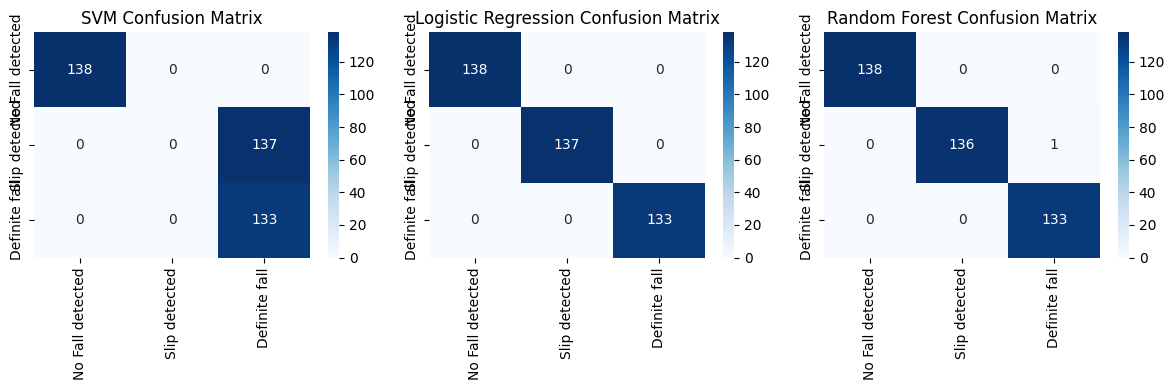

In [42]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues',xticklabels=outcome_list, yticklabels=outcome_list)
plt.title('SVM Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues',xticklabels=outcome_list, yticklabels=outcome_list)
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',xticklabels=outcome_list, yticklabels=outcome_list)
plt.title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

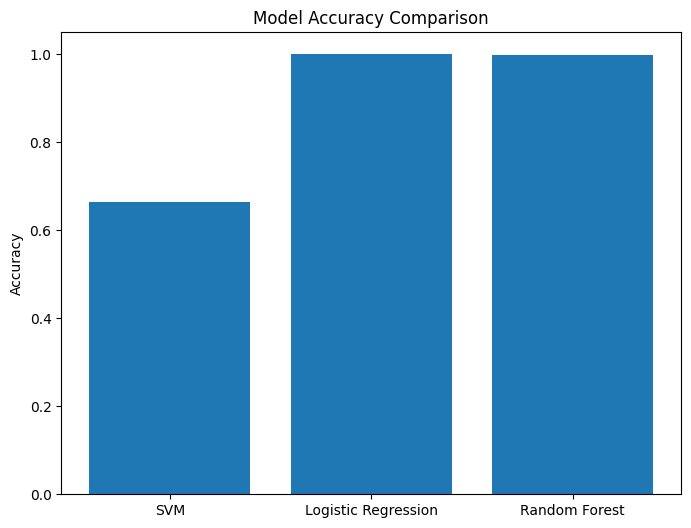

In [43]:
models = ['SVM', 'Logistic Regression', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_svm), log_reg_accuracy, accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()
